In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load the data
df = pd.read_csv('../Data/adult_cleaned_winsorized_label_encoded.csv')
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,native-country,income
0,39,5,77516,9,4,0,1,4,1,2174,40,38,0
1,50,4,83311,9,2,3,0,4,1,0,20,38,0
2,38,2,215646,11,0,5,1,4,1,0,40,38,0
3,53,2,234721,1,2,5,0,2,1,0,40,38,0
4,28,2,338409,9,2,9,5,2,0,0,40,4,0


In [3]:
# Separate the features and the target variable
X = df.drop('income', axis=1)
y = df['income']

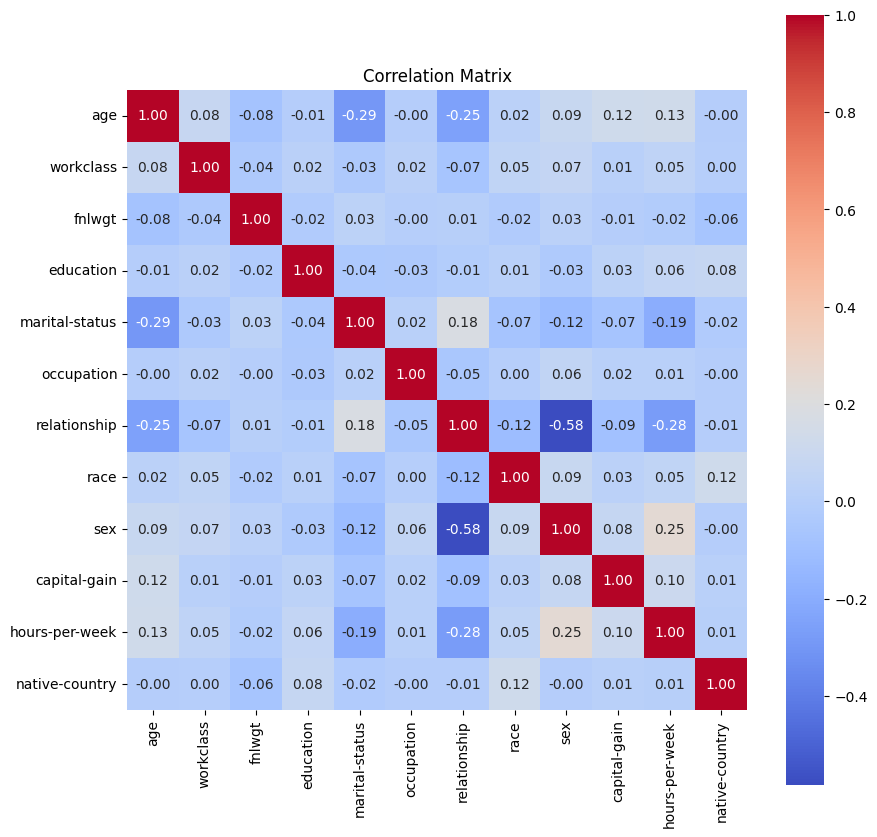

In [4]:
# Checking the correlation between the features
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,native-country
0,0.055399,2.91625,-1.186162,-0.344032,0.943267,-1.482668,-0.258452,0.384230,0.693823,1.473437,-0.079576,0.262722
1,0.946507,1.87300,-1.122653,-0.344032,-0.389548,-0.737662,-0.884386,0.384230,0.693823,-0.291184,-2.124781,0.262722
2,-0.025611,-0.21350,0.327642,0.179935,-1.722363,-0.240991,-0.258452,0.384230,0.693823,-0.291184,-0.079576,0.262722
3,1.189536,-0.21350,0.536690,-2.439903,-0.389548,-0.240991,-0.884386,-2.018206,0.693823,-0.291184,-0.079576,0.262722
4,-0.835710,-0.21350,1.673035,-0.344032,-0.389548,0.752350,2.245285,-2.018206,-1.441290,-0.291184,-0.079576,-5.330650


In [7]:
X = X_scaled

In [8]:
# Instantiate PCA
pca = PCA(n_components=X.shape[1])

# Fit and transform the data
pca.fit_transform(X.values)

array([[-0.83379088, -0.83405678, -0.42812306, ..., -0.0684019 ,
        -0.13934879,  0.19081038],
       [-0.70078155, -0.77864898, -0.08807265, ...,  1.94796252,
        -0.75011227, -0.0768675 ],
       [-0.98864293, -0.31502944, -0.02316095, ...,  0.12117587,
        -1.15358164,  0.23603542],
       ...,
       [-1.23309398,  1.39970185, -0.56341278, ..., -0.53294332,
         0.27439498, -0.18866074],
       [-0.62209614, -1.31503402,  3.20399587, ..., -0.33630622,
        -2.18909647,  1.00020533],
       [-1.69920683,  0.12993934, -0.49413353, ..., -1.55686229,
         0.11710784, -0.2355382 ]])

In [9]:
# To see how much variance captured by each component individually
pca.explained_variance_

array([2.07972764, 1.2089346 , 1.12898793, 1.0361117 , 0.99021093,
       0.97845383, 0.95329839, 0.91890647, 0.84039169, 0.79882011,
       0.67751841, 0.38890395])

#### Explanation:

The observation that the first principal component captures the highest variation, and the subsequent principal components capture decreasing amounts of variance.

This behavior arises from the way PCA works. PCA seeks to find the directions (principal components) in the high-dimensional feature space that capture the maximum amount of variance in the data. The first PC is the direction that explains the largest amount of variance, and subsequent PCs are orthogonal (perpendicular) directions that capture the remaining variance not accounted for by the previous PCs.

In [10]:
# To see how much variance captured together as a percentage
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
cumulative_explained_variance

array([0.1733068 , 0.27404912, 0.36812936, 0.45447009, 0.53698585,
       0.61852186, 0.69796163, 0.77453548, 0.84456657, 0.91113344,
       0.96759205, 1.        ])

#### Explanation:

By computing the cumulative sum, it is adding up the explained variance ratios from the first principal component to the last, which gives the total cumulative proportion of variance explained by all principal components up to that point.

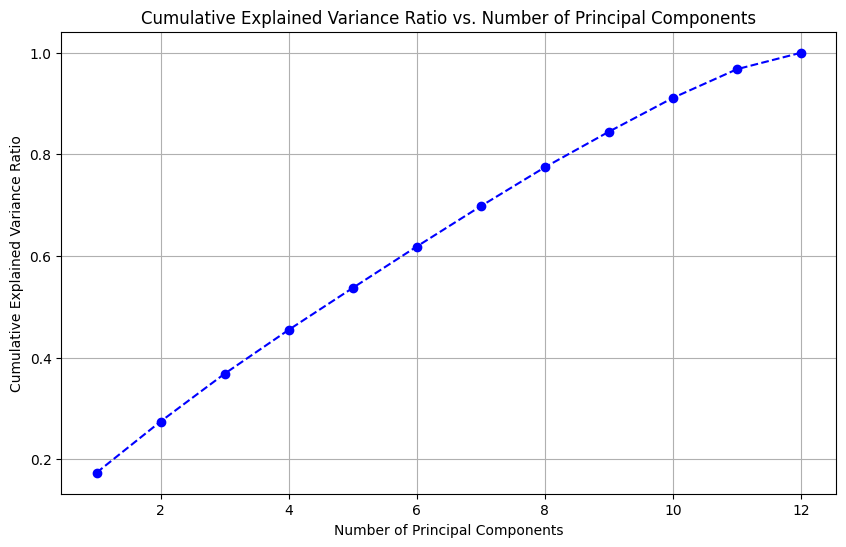

In [20]:
# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

#### Conclusion:

As we can see first 10 Principal Components capture more than 90% of the variance. Therefore only 10 Principal Components have been selected.

In [21]:
# Get only the first 10 principal components
pca = PCA(n_components=10)

X_pca = pca.fit_transform(X.values)

In [23]:
X_pca = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, 11)])
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.833791,-0.834057,-0.428123,1.270210,-0.628944,1.810563,1.403999,2.637943,-0.459801,-0.068402
1,-0.700782,-0.778649,-0.088073,1.882713,-1.427898,0.743143,0.333254,0.656279,-0.642237,1.947963
2,-0.988643,-0.315029,-0.023161,-0.473199,-0.655722,-0.409015,-0.039641,-0.874890,0.003276,0.121176
3,-0.787558,1.448110,1.690085,0.710458,-0.799172,-1.025242,-0.399819,0.175826,-2.323750,-0.151024
4,2.767660,2.777848,4.160498,-0.441817,0.505387,1.326357,0.632506,-1.235613,2.492739,-0.741304


In [24]:
# Concatenate the target variable
df = pd.concat([X_pca, y], axis=1)
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,income
0,-0.833791,-0.834057,-0.428123,1.270210,-0.628944,1.810563,1.403999,2.637943,-0.459801,-0.068402,0
1,-0.700782,-0.778649,-0.088073,1.882713,-1.427898,0.743143,0.333254,0.656279,-0.642237,1.947963,0
2,-0.988643,-0.315029,-0.023161,-0.473199,-0.655722,-0.409015,-0.039641,-0.874890,0.003276,0.121176,0
3,-0.787558,1.448110,1.690085,0.710458,-0.799172,-1.025242,-0.399819,0.175826,-2.323750,-0.151024,0
4,2.767660,2.777848,4.160498,-0.441817,0.505387,1.326357,0.632506,-1.235613,2.492739,-0.741304,0


In [25]:
# Save the data
df.to_csv('../Data/adult_pca.csv', index=False)